# Alpha Ratio method for W+jet estimation (NEW)

> In this notebook I grabed the corrected W+jets from histogram but since this histogram was not contaning the scale to I need to scale it but the scaling method also scales the error bars.

* Data/MC control plot in W+jet control region without any correction from data. All backgrounds are pure MCs

normal scale | Log Scale
:-:|:-:
![fig1](JupyterNotebookPlots/DibosonBoostedElMuCuts13TeV_WjetControlRegion_Tighter_CHS_mass_lvj_type0_PuppiAK8.png) |![fig2](JupyterNotebookPlots/DibosonBoostedElMuCuts13TeV_WjetControlRegion_Tighter_CHS_mass_lvj_type0_PuppiAK8_log.png)

* Data/MC control plot in W+jet control region after corrected the shape and normalization for W+jets according to data. Shape and normalization for W+jets are taken from fit to data.

normal scale | Log Scale
:-:|:-:
![fig1](plots_em_HP/m_lvj_fitting/m_lvj_sb_lo_WJets0_xww__with_pull.png) | ![fig2](plots_em_HP/m_lvj_fitting/m_lvj_sb_lo_WJets0_xww__log.png)


* Steps for W+jets estimation from alpha is
    * STEP-1: Divide W+jet pure MC in signal region and sideband region. This will give us alpha.
    * STEP-2: Get the modified shape of W+jet after fitting to data.
    * STEP-3: Multiply the alpha to this modified shape to get the W+Jet shape in signal region.

```
#  Name                     Cut string
#"type=ele(1),muon(0)

"mu"			"(type==0||type==1)"
"1 lepton"		"(l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566)))))"


"pfMETpuppi>30"		"(((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80)))"


"Good FatJet"		"((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55))"


"Anti-btag VBF jets"    "(nBTagJet_loose==0)"


"VBF Mjj > 800"         "(vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 )"
"VBF jet deta > 4.0"    "(abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0)"	
"VBF jet pts > 30"	"((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30))"


"m_{J}<50 && m_{J}>110"	"((((PuppiAK8_jet_mass_so>40) && (PuppiAK8_jet_mass_so<65)) || ((PuppiAK8_jet_mass_so>105) && (PuppiAK8_jet_mass_so<150))))"


"mass cut"                "(mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600)"


"Zeppenfeld<x"           "((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3)"
"Zeppenfeldh<x"           "((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3)"
"Centrality"              "(BosonCentrality_type0>1.0)"
```

In [1]:
import ROOT as r

# To surpress unwanted messages
msgservice = r.RooMsgService.instance()
msgservice.setGlobalKillBelow(r.RooFit.FATAL)

%matplotlib inline

Welcome to JupyROOT 6.08/05


In [2]:
c = r.TCanvas("c", "canvas", 800, 600)
c.cd()

r.TGaxis.SetMaxDigits(3)

leg = r.TLegend(0.55,0.9,.9,0.6)

180.742864517


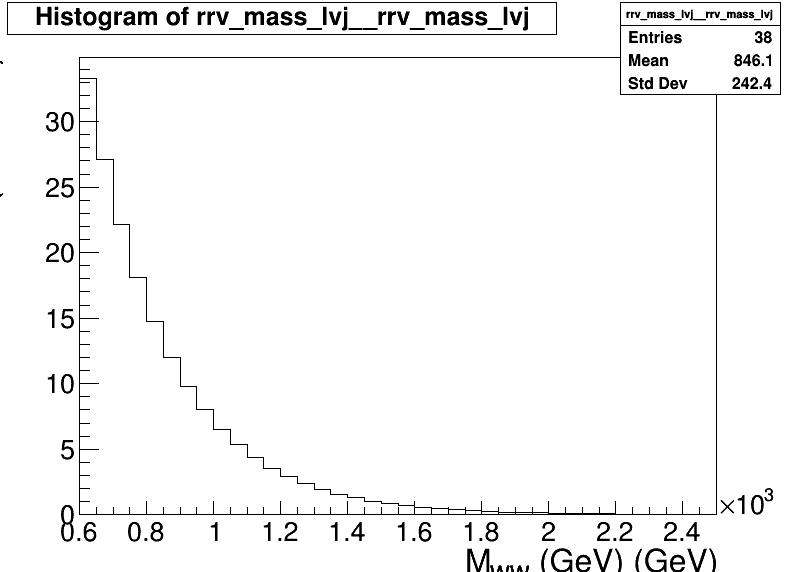

In [3]:
Wjet_file = r.TFile.Open("RootFile_600_2500/wjetmodel_Ex__WJets0_xww__sb_lo_Exp_auto.root")
Wjet_hist = r.TH1F()
Wjet_hist.Sumw2()
Wjet_hist = Wjet_file.Get("rrv_mass_lvj__rrv_mass_lvj")
Wjet_hist.Scale(181.053970958)
print Wjet_hist.Integral()
Wjet_hist.Draw("same hist")
c.Draw()


In [4]:
c.Clear()
fin_VV = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_AlphaRatioBkgEst_2018_03_27_02h28/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VV.root")
fin_TTbar = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_AlphaRatioBkgEst_2018_03_27_02h28/HaddedFiles/Hadds_for_BkgEstimation/WWTree_TTbar.root")
fin_STop = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_AlphaRatioBkgEst_2018_03_27_02h28/HaddedFiles/Hadds_for_BkgEstimation/WWTree_STop.root")
fin_Data = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_AlphaRatioBkgEst_2018_03_27_02h28/HaddedFiles/Hadds_for_BkgEstimation/WWTree_data_golden.root")

treeIn_VV = fin_VV.Get("otree")
treeIn_TTbar = fin_TTbar.Get("otree")
treeIn_STop = fin_STop.Get("otree")
treeIn_Data = fin_Data.Get("otree")

In [5]:
Wjet_hist.SetMarkerColor(625)
Wjet_hist.SetLineColor(625)
Wjet_hist.SetFillColor(625)
Wjet_hist.SetLineWidth(3)
Wjet_hist.SetMarkerSize(5)

hVV = r.TH1D("hVV","",38,600,2500)
hVV.SetMarkerColor(607)
hVV.SetLineColor(607)
hVV.SetFillColor(607)
hVV.SetLineWidth(3)
hVV.SetMarkerSize(5)

hTTbar = r.TH1D("hTTbar","",38,600,2500)
hTTbar.SetMarkerColor(592)
hTTbar.SetLineColor(592)
hTTbar.SetFillColor(592)
hTTbar.SetLineWidth(3)
hTTbar.SetMarkerSize(5)

hSTop = r.TH1D("hSTop","",38,600,2500)
hSTop.SetMarkerColor(854)
hSTop.SetLineColor(854)
hSTop.SetFillColor(854)
hSTop.SetLineWidth(3)
hSTop.SetMarkerSize(5)

hData = r.TH1D("hData","",38,600,2500)
hData.SetMarkerColor(1)
hData.SetLineColor(1)
#hData.SetFillColor(1)
hData.SetLineWidth(3)
hData.SetMarkerSize(5)

cutString_SideBand =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 ) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && (((PuppiAK8_jet_mass_so>40)&&(PuppiAK8_jet_mass_so<65)) || ((PuppiAK8_jet_mass_so>105)&&(PuppiAK8_jet_mass_so<150))) && (mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

cutString_Lower_SideBand =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 ) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && (((PuppiAK8_jet_mass_so>40)&&(PuppiAK8_jet_mass_so<65))) && (mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

cutString_Signal =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 ) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((PuppiAK8_jet_mass_so>65) && (PuppiAK8_jet_mass_so<105)) && (mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"



treeIn_VV.Draw("mass_lvj_type0_PuppiAK8>>hVV",cutString_Lower_SideBand)
treeIn_TTbar.Draw("mass_lvj_type0_PuppiAK8>>hTTbar",cutString_Lower_SideBand)
treeIn_STop.Draw("mass_lvj_type0_PuppiAK8>>hSTop",cutString_Lower_SideBand)

#cutString_SigData =  "((l_pt2<0) && ((l_pt1>30.) && (abs(l_eta1)<2.5)) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) &&  (nBTagJet_loose==0) && (pfMET_Corr>50) && ((PuppiAK8_jet_tau2tau1<0.55)) && ((PuppiAK8_jet_mass_so>55) && (PuppiAK8_jet_mass_so<65)) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && (vbf_maxpt_jj_m>800) && (BosonCentrality_type0>1.0) && (abs(ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3) && (abs(ZeppenfeldWH/vbf_maxpt_jj_Deta)<0.3) && (mass_lvj_type0>170))"

cutString_SigData =  "((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 ) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((PuppiAK8_jet_mass_so>65) && (PuppiAK8_jet_mass_so<105)) && (mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

cutString_SideBand =  "((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 ) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && (((PuppiAK8_jet_mass_so>40)&&(PuppiAK8_jet_mass_so<65)) || ((PuppiAK8_jet_mass_so>105)&&(PuppiAK8_jet_mass_so<150))) && (mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

cutString_Lower_SideBand =  "((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 ) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && (((PuppiAK8_jet_mass_so>40)&&(PuppiAK8_jet_mass_so<65))) && (mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"




treeIn_Data.Draw("mass_lvj_type0_PuppiAK8>>hData",cutString_Lower_SideBand)

220L

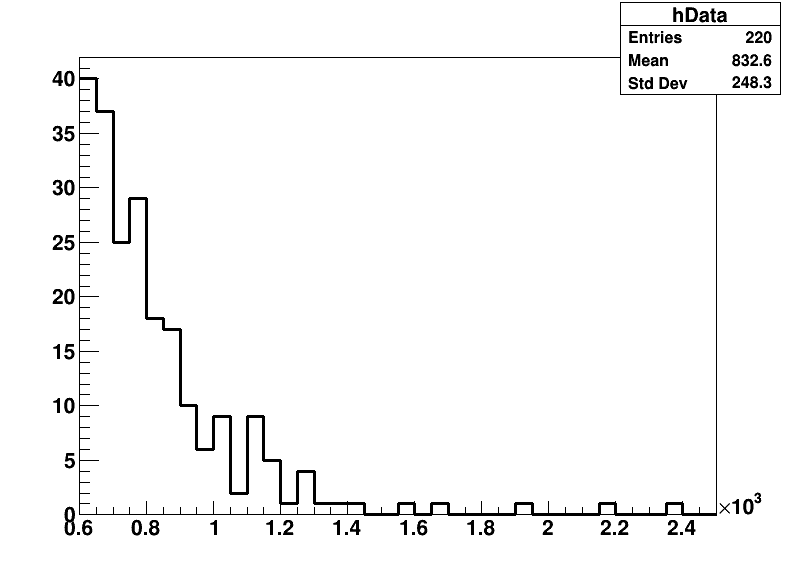

In [6]:
c.Clear()
hData.Draw()
c.Draw()

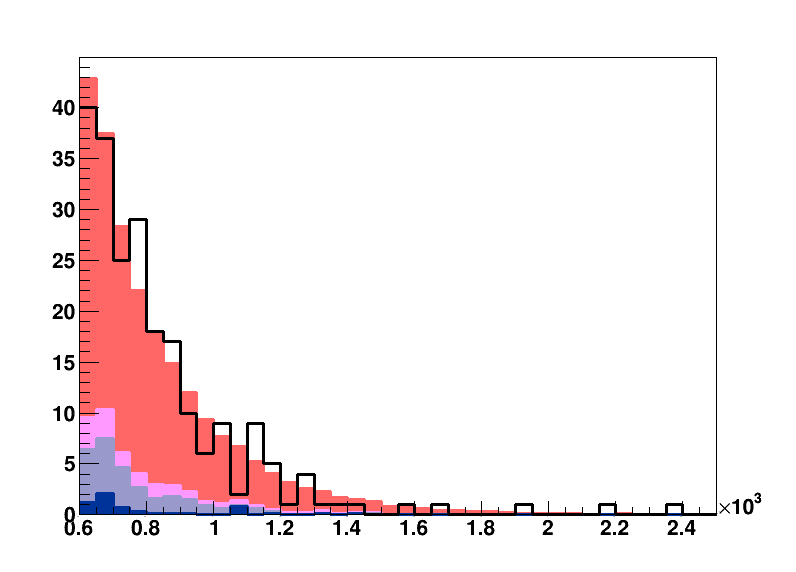

In [7]:
stack = r.THStack()

stack.Add(hSTop,"F")
stack.Add(hTTbar,"F")
stack.Add(hVV,"F")
stack.Add(Wjet_hist,"F")

#stack.SetMaximum(400)
stack.Draw("hist")
hData.Draw("same hist")

c.Draw()

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 16 points have been skipped


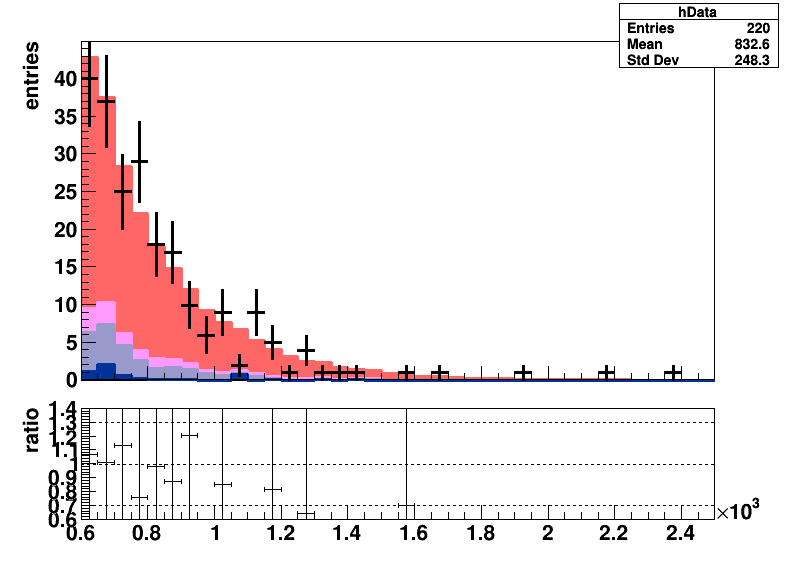

In [8]:
rp = r.TRatioPlot(stack, hData);
#c.SetTicks(0, 1);
rp.Draw();
rp.GetLowerRefYaxis().SetTitle("ratio");
rp.GetUpperRefYaxis().SetTitle("entries");
rp.GetLowerRefXaxis().SetTitle("M_{ww}");
rp.GetLowerRefGraph().SetMinimum(0.6);
rp.GetLowerRefGraph().SetMaximum(1.4);
c.Update();
c.Draw()